<h1 style="color:rgb(0,120,170)">Ensemble Methods</h1>




First we try to write the expressions in (1) in the form $\sum_{b(\mathbf{x}_i)=y_i}(...)+\sum_{b(\mathbf{x}_i)\ne y_i}(...)$.

$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l w_i^{(n)} \exp(-y_i \beta b(\mathbf{x}_i))$$

$$ = \arg \min \ \exp(-\beta) \sum_{y_i = b_n(x_i)} w_i^{(n)} + \exp(\beta) \sum_{y_i \ne b_n(x_i)} w_i^{(n)} $$
$$ = \arg \min \ (\exp(\beta) - \exp(-\beta)) \sum_{b(x_i)\ne y_i} w_i^{(n)} + \exp(-\beta) \sum^l_{i=1} w_i^{(n)} $$





$$ w_i^{(n+1)}=w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x})) $$ 
$$ = w_i^{(n+1)}=w_i^{(n)} \exp(-\beta_n y_i b_n(\mathbf{x})) $$
$$ =w_i^{(n)} \exp(2I(y_i \ne b_n(\mathbf{x}_i)) - \beta_n) $$
$$ =w_i^{(n)} \exp(-\beta_n) \exp(2\beta_n I(y_i \ne b_n(\mathbf{x}_i)) $$
$$ =w_i^{(n)} \exp(-\beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i)) $$

<h2 style="color:rgb(0,120,170)">Random Forests and Feature importance</h2>



In [1]:

import numpy as np
import pandas as pd
import sys
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
# Set random seed to ensure reproducible runs
RSEED = 10

In [2]:
data = MNIST('./dataset/')
img_train, labels_train = data.load_training()
x_train = np.array(img_train)
y_train = np.array(labels_train)
x_test,y_test = data.load_testing()
x_test = np.array(x_test)
y_test = np.array(y_test)
print(y_train)
print(y_test)

[2 9 6 ... 8 8 7]
[0 1 2 ... 8 8 1]


In [3]:
"""Function _filter_() is created to filter datasets w.r.t to given labels
@param x_train Training feature matrix
@param y_train Training labels vector
@param x_test Test feature matrix
@param y_test Test labels vector
@param labels_list list of length 2 which consists of integer labels.

@returns a tuple (x_train_filtered, y_train_filtered, x_test_filtered, y_test_filtered). 
"""
def _filter_(x_train:np.array, 
             y_train:np.array, 
             x_test:np.array, 
             y_test:np.array, 
             labels_list:list):
    

    idxs_train = np.logical_or(y_train == labels_list[0], y_train == labels_list[1])
    print(idxs_train)
    x_train_filtered, y_train_filtered = x_train[idxs_train], y_train[idxs_train]
    y_train_filtered = np.where(y_train_filtered==labels_list[0], 1, y_train_filtered)
    y_train_filtered = np.where(y_train_filtered==labels_list[1], 0, y_train_filtered)

    idxs_test = np.logical_or(y_test == labels_list[0], y_test == labels_list[1])
    x_test_filtered, y_test_filtered = x_test[idxs_test], y_test[idxs_test]
    y_test_filtered = np.where(y_test_filtered==labels_list[0], 1, y_test_filtered)
    y_test_filtered = np.where(y_test_filtered==labels_list[1], 0, y_test_filtered)
    

    
    return (x_train_filtered, y_train_filtered, x_test_filtered, y_test_filtered)

In [4]:
x_train, y_train, x_test, y_test = _filter_(x_train, y_train, x_test, y_test, [1,9])
print(y_train)
print(y_test)

[False  True False ... False False False]
[0 0 0 ... 0 0 1]
[1 1 1 ... 0 0 1]


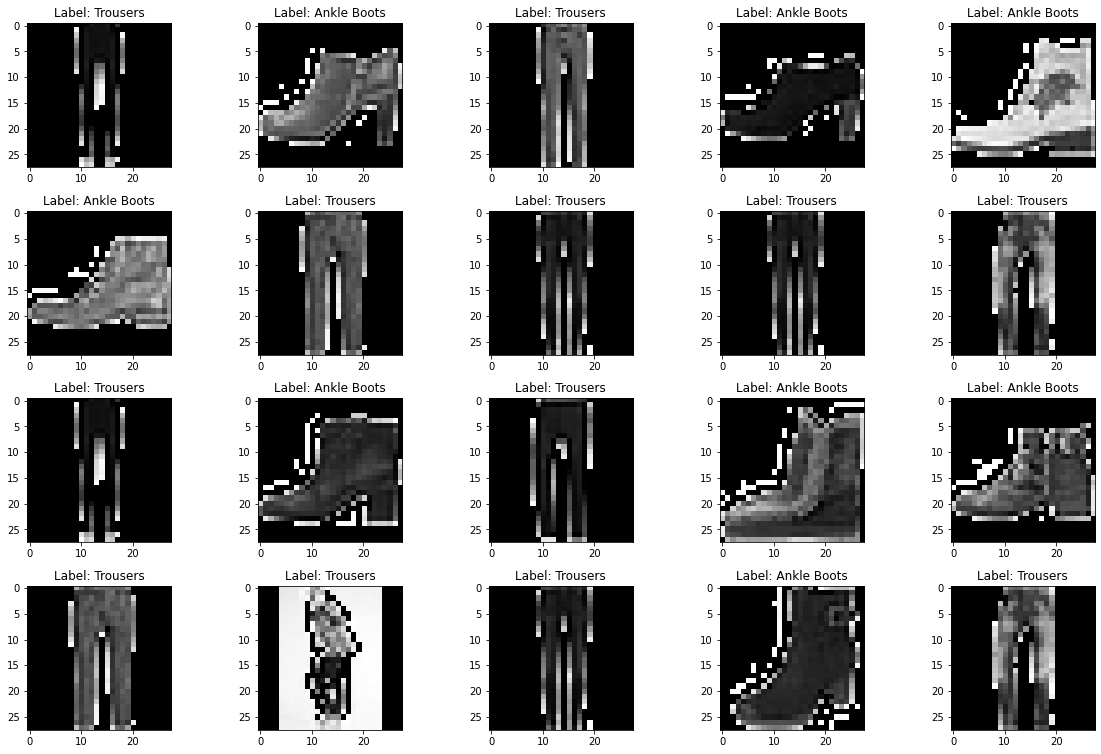

In [5]:
arr = ['Ankle Boots','Trousers']
a = np.random.randint(1,40,20)
plt.figure(figsize=(20, 13))
for n,i in enumerate(a):
    plt.subplot(4, 5, n+1)
    two_d = (np.reshape(x_train[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Label: {0}'.format(arr[y_train[i]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
plt.subplots_adjust(hspace = 0.3)

In [6]:
"""Function fit_predict() is created to fit RF on training data and return predictions as well as model
@param x_train Training feature matrix
@param y_train Training labels vector
@param x_test Test feature matrix
@param y_test Test labels vector
@param rseed Random Seed, integer

@returns a tuple (model, prediction). Where model is an trained RF classifier and prediction is a np array
"""
def fit_predict(x_train,y_train,x_test,y_test, rseed):
    
    np.random.seed(rseed)
    
    RFC = RandomForestClassifier(random_state=rseed)
    model = RFC.fit(x_train,y_train)
    prediction = model.predict(x_test)
    
    return model, prediction

In [7]:
model, prediction = fit_predict(x_train,y_train,x_test,y_test, RSEED)

In [8]:
#NUMBER OF WRONG PREDICTIONS
# size_test = 0
# num_wrong = 0
# items_wrong = []
wrong_idxs = np.where(y_test != prediction)
size_test = len(prediction)
num_wrong = len(wrong_idxs)
items_wrong = x_test[wrong_idxs]


print("Number of test samples: {0}\nNumber of misclassified samples: {1}".format(size_test,num_wrong))

Number of test samples: 2000
Number of misclassified samples: 1


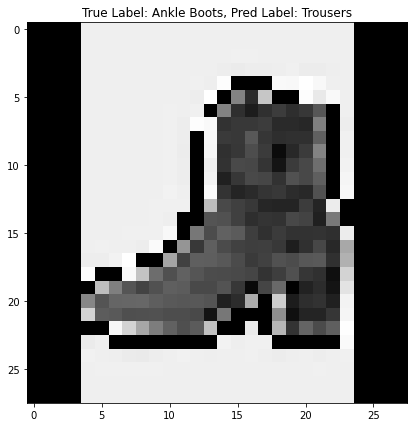

In [9]:


plt.figure(figsize=(10, 7))
for misclass in items_wrong:
    two_d = (np.reshape(misclass, (28, 28)) * 255).astype(np.uint8)
    plt.title('True Label: {0}, Pred Label: {1}'.format(arr[y_test[np.where(y_test != prediction)[0][0]]],arr[prediction[np.where(y_test != prediction)[0][0]]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')


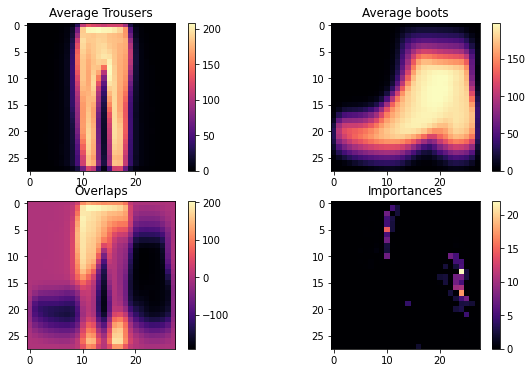

In [10]:
#PLOTTING HEATMAPS



trousers = x_train[np.where(y_train==1)]
boots = x_train[np.where(y_train == 0)]
tr_av = np.average(trousers.reshape(-1, len(trousers[0])), axis=0)
bo_av = np.average(boots.reshape(-1, len(boots[0])), axis=0)

diff = np.subtract(tr_av,bo_av)

importances = model.feature_importances_.reshape((28, 28)) * 255

#Step 4 plot everything together
plt.figure(figsize=(10, 6))

trousers_2d = (tr_av.reshape((28, 28)))
plt.subplot(2,2,1)
plt.title('Average Trousers')
plt.imshow(trousers_2d, interpolation='nearest',cmap='magma')
plt.colorbar()

boots_2d = (bo_av.reshape((28, 28)))
plt.subplot(2,2,2)
plt.title('Average boots')
plt.imshow(boots_2d, interpolation='nearest',cmap='magma')
plt.colorbar()

diff_2s = (diff.reshape((28, 28)))
plt.subplot(2,2,3)
plt.title('Overlaps')
plt.imshow(diff_2s,interpolation='nearest',cmap='magma')
plt.colorbar()


plt.subplot(2,2,4)
plt.title('Importances')
plt.imshow(importances,interpolation='nearest',cmap='magma')
plt.colorbar()


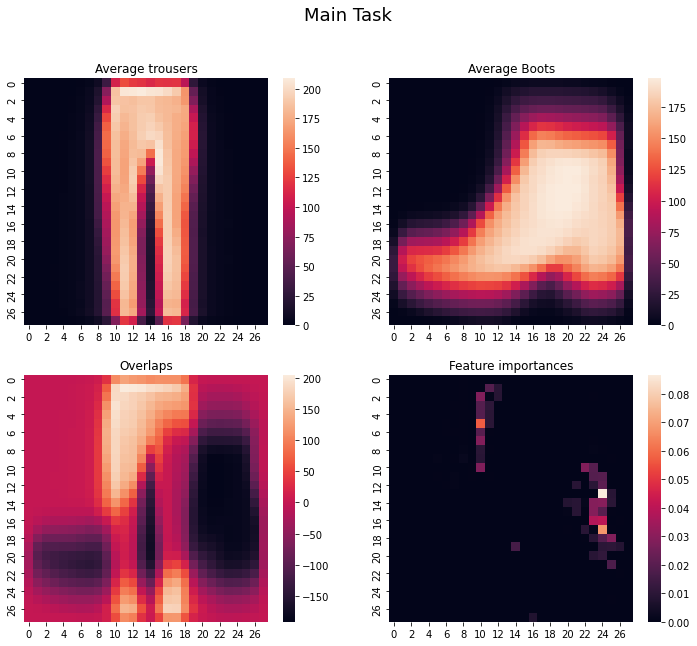

In [12]:
def filter_tl(xt,yt,xte,yte,labels_list):
    try:
        xtf, ytf, xtef, ytef = _filter_(xt,yt,xte,yte,labels_list)
        res = (xtf.tolist(), ytf.tolist(), xtef.tolist(), ytef.tolist())
        print('Filtering works')
        return res
    except Exception as e:
        print("Execution of _filter_, or convertion from np.array to list failed")
        print(e)
        raise ValueError()
        
def model_param(xt,yt,xte,yte):
    try:
        model, pred = fit_predict(xt,yt,xte,yte,RSEED)
        nfeat = model.n_features_in_
        nclass = model.n_classes_
        print("Model is valid object")
        return nfeat,nclass
    except Exception as e:
        print("Execution of fit_predict, or model parameters extraction failed")
        print(e)
        raise ValueError()
        
def testoptions(options):
    for elem in options:
        if elem!=True and elem!=False and elem!=None:
            raise ValueError(f"Check answers for questions again")
    print("Test questions answers are ok")

In [13]:

xt,yt,xte,yte = np.array([[1,1,1],[9,9,9],[5,5,5]]),np.array([1,9,5]),np.array([[0,0,0],[1,1,1],[9,9,9]]),np.array([0,1,9])

xt,yt,xte,yte = filter_tl(xt,yt,xte,yte,[1,9])
model_param(xt,yt,xte,yte)

print('Executable')

[ True  True False]
Filtering works
Model is valid object
Test questions answers are ok
Executable
